# Projection comparison of Rounce et al. (2023) to our model options

- this notebook is not yet cleaned up -> it will be done later!

In [1]:
# path where OGGM gdirs are: is created in data_creating_scripts
working_dir = '../oggm_run_gdir_folder/node_folder'
# figure path
fig_path = '../figures'
# data path -> data created from 00_data_creating scripts
data_path = '../01_data'

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### path to Rounce et al. (2023) data
fpath = '/home/www/lschuster/rounce_2023_data'


**Only Hintereisferner:**

In [148]:
# get all Alpine glaciers and all SSP scenarios
# there are also RCP scenarios (but we don't want them for this analysis)
dts = [] 
for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']: #'ssp119',
    
    _dt = xr.open_dataset(f'{fpath}/R11_glac_mass_annual_50sets_2000_2100-{ssp}.nc')
    _dt['glacier'] = _dt.RGIId
    _dt['model'] = _dt.Climate_Model
    _dt['ssp'] = ssp
    dts.append(_dt)
dt_ssp = xr.concat(dts, dim = 'ssp')


Text(0.5, 1.0, 'Rounce et al. (2023) - Hintereisferner: 12 GCMs')

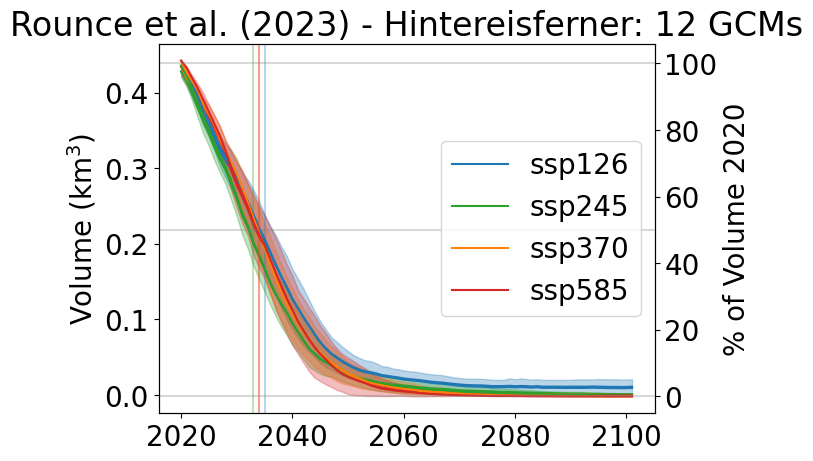

In [149]:
colors_ssp = ['#1f77b4', '#2ca02c',  '#ff7f0e', '#d62728']
rgi_id_hef = ['RGI60-11.00897']

dvol_sel = dt_ssp.sel(glacier = rgi_id_hef).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)
dvol_sel = dvol_sel.sel(year=slice(2020,2101))
dt_vol = dvol_sel.mean(dim='model') 
dt_vol_std = dvol_sel.std(dim='model') 
dt_vol_2020 = dt_vol.sel(year=2020).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp245', 'ssp370', 'ssp585']):
    plt.plot(dt_vol.year, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.year, 
                     dt_vol.sel(ssp=ssp)-dt_vol_std.sel(ssp=ssp),
                     dt_vol.sel(ssp=ssp)+dt_vol_std.sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.3) #kg/m3
    

ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp245', 'ssp370', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
plt.axhline(0, color = 'grey', alpha = 0.3)
plt.axhline(50, color='grey', alpha = 0.3)
plt.axhline(100, color='grey', alpha = 0.3)
plt.ylabel('% of Volume 2020')
plt.legend()

plt.title(f'Rounce et al. (2023) - Hintereisferner: 12 GCMs')
#plt.savefig('rounce_2023_hef_evolution.png')

## Comparison with OGGM massbalance-sandbox

### Aletsch glacier

27.791546395362595
0.21969260278913394
36.06548
0.62119347


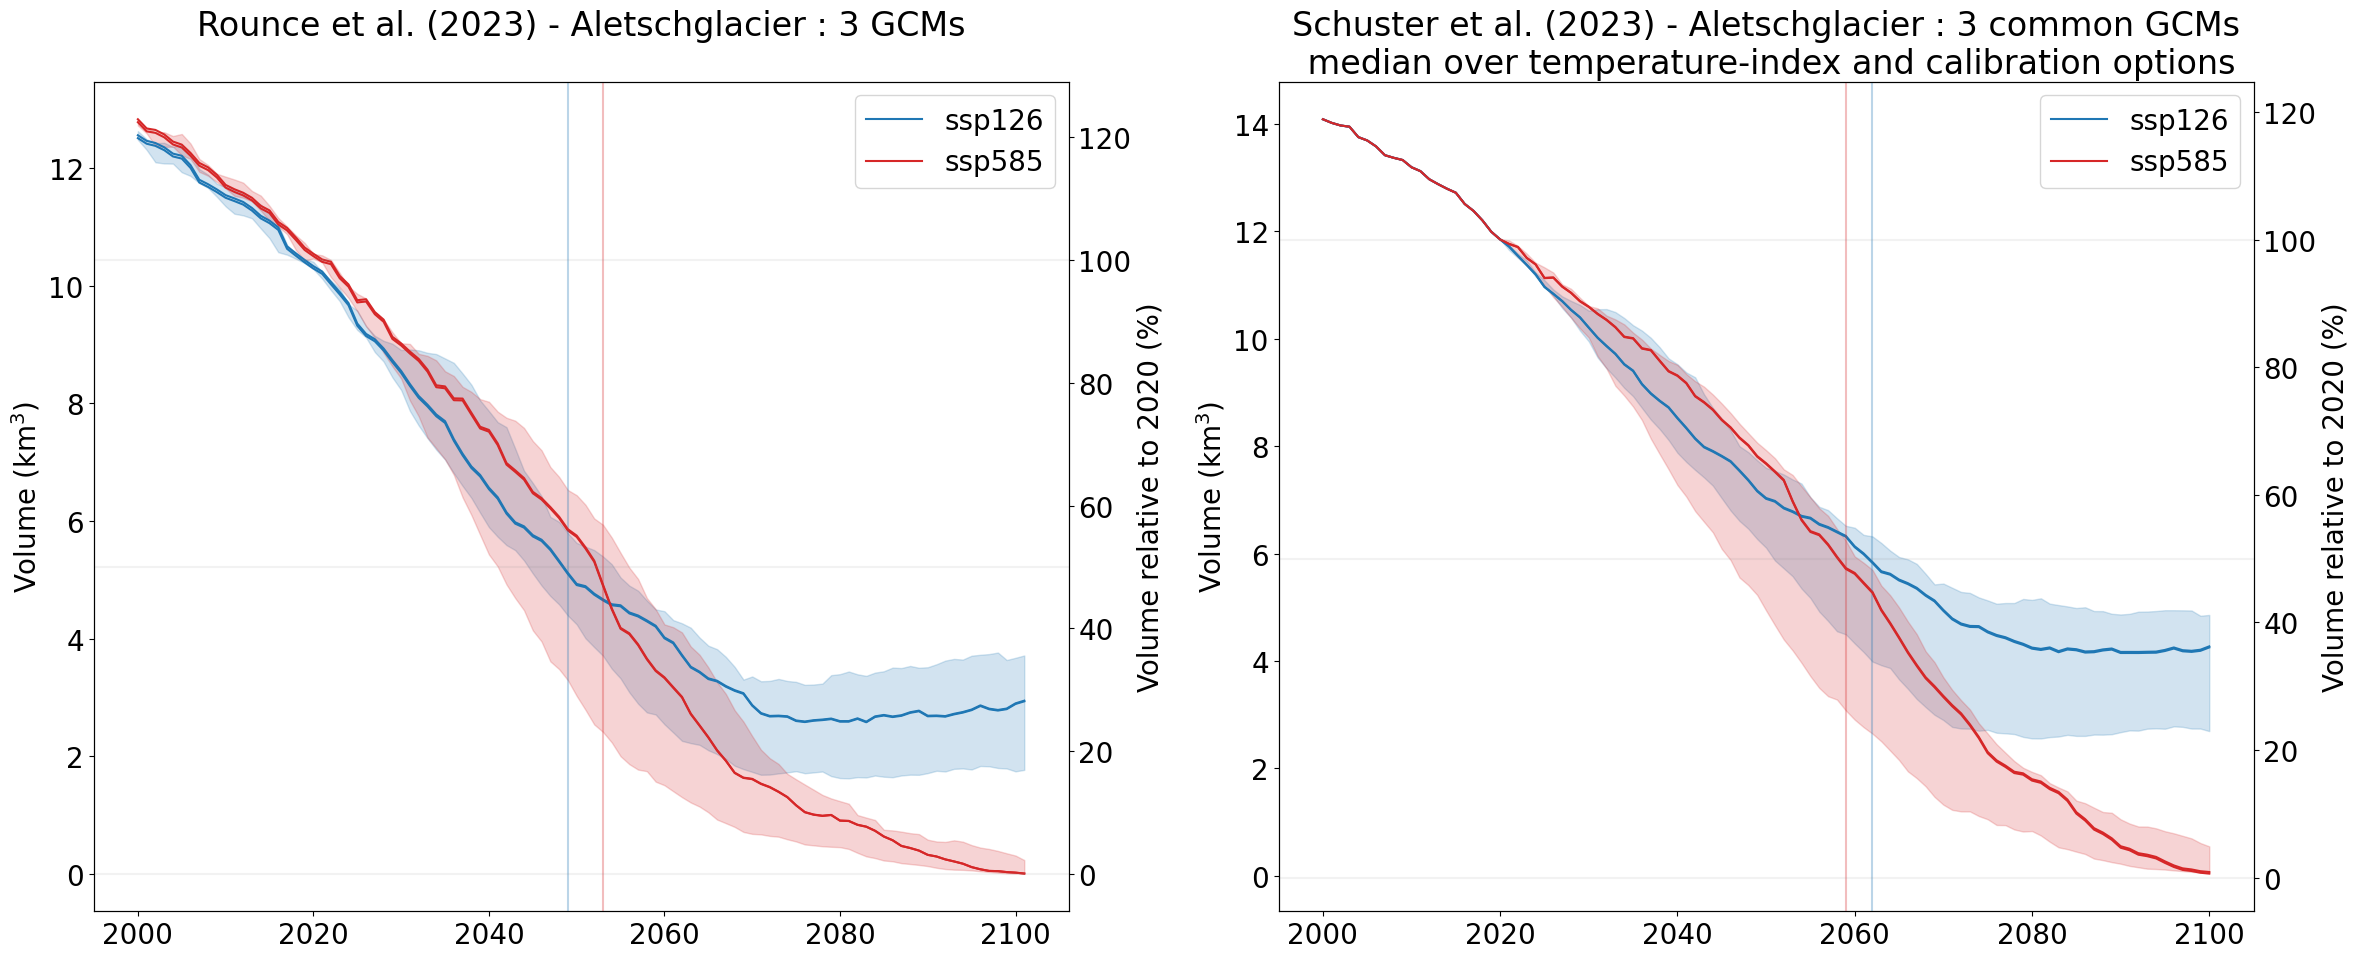

In [155]:
rgi_ids = ['RGI60-11.01450']
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 

#########
plt.figure(figsize=(24,10))

plt.subplot(121)

dt_ssp_common = dt_ssp.sel(model = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])

dvol_sel = dt_ssp_common.sel(glacier = rgi_ids).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)

dvol_sel = dvol_sel.sel(year=slice(2000,2101))
dt_vol = dvol_sel.median(dim='model') 
dt_vol_2020 = dt_vol.sel(year=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.year, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.year, 
                     dvol_sel.min(dim='model').sel(ssp=ssp),
                     dvol_sel.max(dim='model').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3

ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
    
    print(dt_vol_rel_ssp.sel(year=2100).values)

plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('Volume relative to 2020 (%)')
plt.legend()

#plt.ylim([-0.01,125])
plt.title(f'Rounce et al. (2023) - Aletschglacier : 3 GCMs\n')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')


################################
plt.subplot(122)
dt_oggm_mbsandbox_options = xr.open_dataset(f'{data_path}/3_volume_proj_common_running_refs_w5e5_isimip3b.nc')
dt_oggm_mbsandbox_options = dt_oggm_mbsandbox_options.sel(gcm = ['gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1',
                                                                 'mri-esm2-0_r1i1p1f1'])


dvol_sel = dt_oggm_mbsandbox_options.sel(rgi_id = rgi_ids).volume.sum(dim='rgi_id')/1e9 # kg into V (km3)

dvol_sel = dvol_sel.median(dim=['grad_type','mb_type', 'melt_f_change', 'calib_type'])

dvol_sel = dvol_sel.sel(time=slice(2000.,2100.))
dt_vol = dvol_sel.median(dim='gcm') 
dt_vol_2020 = dt_vol.sel(time=2020.).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_vol.time, dt_vol.sel(ssp=ssp), color = colors_ssp[j]) #kg/m3
    plt.fill_between(dt_vol.time, 
                     dvol_sel.min(dim='gcm').sel(ssp=ssp),
                     dvol_sel.max(dim='gcm').sel(ssp=ssp),
                     color = colors_ssp[j], alpha = 0.2) #kg/m3
ax = plt.gca()
ax.set_ylabel(r'Volume (km$^3$)')
ax2 = ax.twinx()

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax2.plot(dt_vol_rel_ssp.time, dt_vol_rel_ssp,
             label=ssp,
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='time').isel(time=0).time
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
    print(dt_vol_rel_ssp.sel(time=2100).values)

plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('Volume relative to 2020 (%)')

plt.legend()

# ax2.ylim([-0.01,125])

plt.title(f'Schuster et al. (2023) - Aletschglacier : 3 common GCMs\n median over temperature-index and calibration options')
plt.tight_layout()
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')


All in one figure -> but now only relativ volume change:

Rounce: yr >50% lost under ssp126: 2049, lost in 2100: 27.8%
Rounce: yr >50% lost under ssp585: 2053, lost in 2100: 0.2%
our options: yr >50% lost under ssp126: 2062, lost in 2100: 36.1%
our options: yr >50% lost under ssp585: 2059, lost in 2100: 0.6%


Text(0.5, 44.7222222222222, 'year')

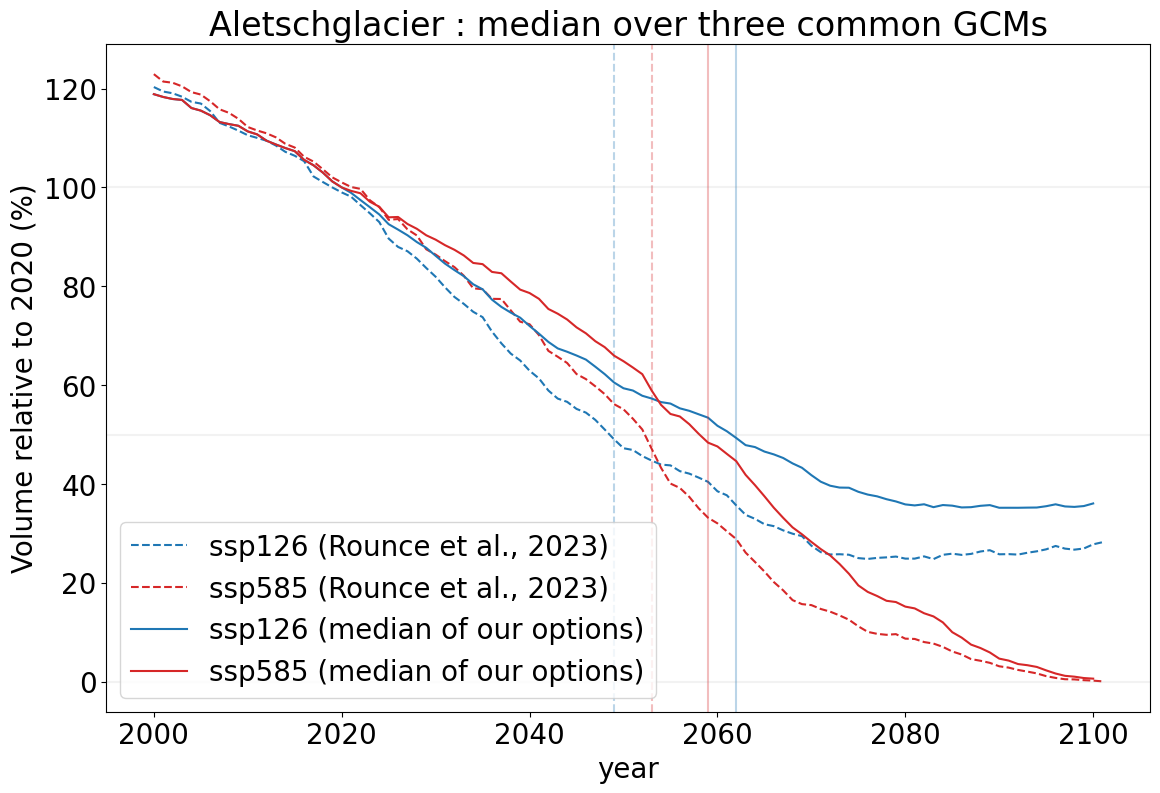

In [166]:
rgi_ids = ['RGI60-11.01450']
colors_ssp = ['#1f77b4','#d62728'] # '#2ca02c',  '#ff7f0e', 

#########
plt.figure(figsize=(12,8))
ax = plt.gca()

### Rounce plot
dt_ssp_common = dt_ssp.sel(model = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])
dvol_sel = dt_ssp_common.sel(glacier = rgi_ids).glac_mass_annual.sum(dim='glacier')/900/1e9 # kg into V (km3)
dvol_sel = dvol_sel.sel(year=slice(2000,2101))
dt_vol = dvol_sel.median(dim='model') 
dt_vol_2020 = dt_vol.sel(year=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax.plot(dt_vol_rel_ssp.year, dt_vol_rel_ssp,
             label=ssp+ ' (Rounce et al., 2023)',
            color = colors_ssp[j], ls = '--') #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='year').isel(year=0).year
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3, ls = '--')
    print(f'Rounce: yr >50% lost under {ssp}: {yr_50_perc.values}, lost in 2100: {dt_vol_rel_ssp.sel(year=2100).values:.1f}%')
################################
dt_oggm_mbsandbox_options = xr.open_dataset(f'{data_path}/3_volume_proj_common_running_refs_w5e5_isimip3b.nc')
dt_oggm_mbsandbox_options = dt_oggm_mbsandbox_options.sel(gcm = ['gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1',
                                                                 'mri-esm2-0_r1i1p1f1'])

dvol_sel = dt_oggm_mbsandbox_options.sel(rgi_id = rgi_ids).volume.sum(dim='rgi_id')/1e9 # kg into V (km3)

dvol_sel = dvol_sel.median(dim=['grad_type','mb_type', 'melt_f_change', 'calib_type'])

dvol_sel = dvol_sel.sel(time=slice(2000.,2100.))
dt_vol = dvol_sel.median(dim='gcm') 
dt_vol_2020 = dt_vol.sel(time=2020.).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = dt_vol.sel(ssp=ssp)*100/dt_vol_2020
    ax.plot(dt_vol_rel_ssp.time, dt_vol_rel_ssp,
             label=ssp+ ' (median of our options)',
            color = colors_ssp[j]) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='time').isel(time=0).time
    plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
    #print(dt_vol_rel_ssp.sel(time=2100).values)
    print(f'our options: yr >50% lost under {ssp}: {yr_50_perc.values}, lost in 2100: {dt_vol_rel_ssp.sel(time=2100).values:.1f}%')


plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('Volume relative to 2020 (%)')

plt.legend()

# ax2.ylim([-0.01,125])

plt.title(f'Aletschglacier : median over three common GCMs')
plt.tight_layout()
plt.xlabel('year')
#plt.savefig('rounce_2023_aletsch_glacier_evolution.png')


- over the median of the 3 common GCMs, the relative volume loss relative to 2020 of Aletsch glacier under SSP1-2.6 from \citet{Rounce2023data} is around 13\% larger than our median option, but lies within the range of our various examined model options. 

In [167]:
(100-27.8)/(100-36.1)

1.129890453834116

## Create global projection dataset 

In [92]:
# get all glaciers and some SSP scenarios
# there are also RCP scenarios (but we don't want them for this analysis)

dt_ssp_l = []
for r in np.arange(1,20,1):
    if r<10:
        r = f'0{r}'
    else:
        r = str(r)
    
    dts = [] 
    for ssp in ['ssp126', 'ssp585']:
        #['ssp119','ssp126', 'ssp245', 'ssp370', 'ssp585']: #'ssp119',
        _dt = xr.open_dataset(f'{fpath}/R{r}_glac_mass_annual_50sets_2000_2100-{ssp}.nc')
        _dt = _dt.set_index(glacier = 'RGIId')
        _dt = _dt.set_index(model = 'Climate_Model')
        _dt['ssp'] = ssp 
        _dt['RGI_reg'] = r 
        dts.append(_dt)
          
    dt_ssp = xr.concat(dts, dim = 'ssp')
    _dt.close()
    dt_ssp_l.append(dt_ssp)

dt_ssp_all = xr.concat(dt_ssp_l, dim='glacier')
dt_ssp_all = dt_ssp_all.drop('crs')
dt_ssp_all = dt_ssp_all.rename_dims({'model':'gcm', 'glacier':'rgi_id', 'year':'time'})
dt_ssp_all = dt_ssp_all[['glac_mass_annual', 'RGI_reg']]
dt_ssp_all = dt_ssp_all.set_index(gcm='model')
dt_ssp_all = dt_ssp_all.set_index(rgi_id='glacier')
dt_ssp_all = dt_ssp_all.set_index(time = 'year')
dt_ssp_all['gcm'] = [x.lower() for x in dt_ssp_all.gcm.values]
#dt_ssp_all['volume'] = dt_ssp_all.glac_mass_annual/ 900

In [93]:
dt_ssp_all_sum = dt_ssp_all.sum(dim='rgi_id')
dt_ssp_all_sum_rel = 100*dt_ssp_all_sum/dt_ssp_all_sum.sel(time=2020)

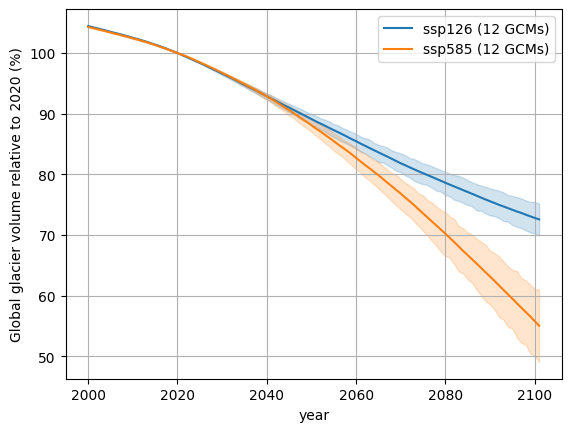

In [111]:
   
for j,ssp in enumerate(['ssp126',  'ssp585']): #'ssp245', 'ssp370',
    len_gcm = len(dt_ssp_all_sum_rel.sel(ssp=ssp).dropna(dim='gcm').gcm)
    sns.lineplot(x='time', 
                 y= 'glac_mass_annual',
             data=dt_ssp_all_sum_rel.sel(ssp=ssp).to_dataframe(),
            #color=colors_ssp[j*2],
            label=ssp+f' ({len_gcm} GCMs)')
plt.legend()
plt.ylabel('Global glacier volume relative to 2020 (%)')
plt.xlabel('year')
plt.grid()


In [112]:
reg = '11'

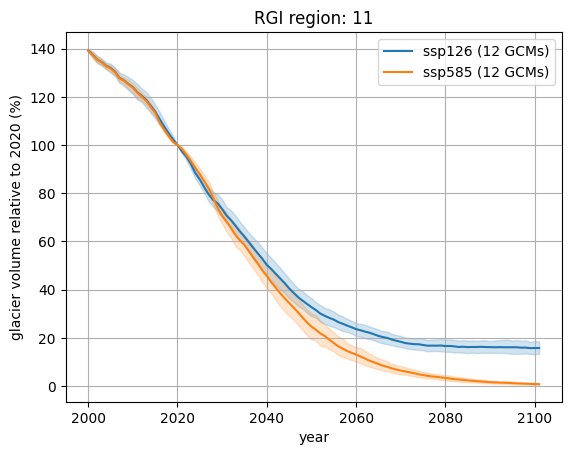

In [113]:
dt_ssp_all_sum_reg = dt_ssp_all.sel(rgi_id=dt_ssp_all.rgi_id.where(dt_ssp_all.RGI_reg == reg).isel(ssp=0).dropna(dim='rgi_id').values).sum(dim='rgi_id')
dt_ssp_all_sum_reg_rel = 100*dt_ssp_all_sum_reg/dt_ssp_all_sum_reg.sel(time=2020)

for j,ssp in enumerate(['ssp126',  'ssp585']): #'ssp245', 'ssp370',
    len_gcm = len(dt_ssp_all_sum_reg_rel.sel(ssp=ssp).dropna(dim='gcm').gcm)
    sns.lineplot(x='time', 
                 y= 'glac_mass_annual',
             data=dt_ssp_all_sum_reg_rel.sel(ssp=ssp).to_dataframe(),
            #color=colors_ssp[j*2],
            label=ssp+f' ({len_gcm} GCMs)')
plt.legend()
plt.title(f'RGI region: {reg}')
plt.ylabel(f'glacier volume relative to 2020 (%)')
plt.xlabel('year')
plt.grid()


## select common projected ref glaciers from Schuster et al., 2023:


best would be to create a common dataset with dimension glacier_model ->
- need to have the same dimension names for that ... 
    - maybe do that at the beginning of the notebook
        - rename year
        - rename model
        - rename glacier 

In [116]:
# data path -> data created from 00_data_creating scripts
data_path = '../01_data'
dt_oggm_options = xr.open_dataset(f'{data_path}/3_volume_proj_common_running_refs_w5e5_isimip3b.nc')
rgi_id_ref = list(dt_oggm_options.rgi_id.values)
dt_oggm_options['time'] = dt_oggm_options.time.astype(int)

# select common glaciers & GCMs  
common_rgis = list(set(rgi_id_ref).intersection(dt_ssp_all.rgi_id.values))
common_gcms = list(set([x[:-len('_r1i1p1f1')] for x in dt_oggm_options.gcm.values]).intersection(dt_ssp_all.gcm.values))


dt_oggm_options = dt_oggm_options.sel(gcm = [x+'_r1i1p1f1' for x in common_gcms])
dt_oggm_options = dt_oggm_options.sel(rgi_id = common_rgis).volume
dt_oggm_options.coords['gcm'] = common_gcms

# select david rounce volume data ... 
dt_ssp_all_comm = dt_ssp_all.sel(rgi_id = common_rgis).sel(gcm = common_gcms).glac_mass_annual/900
dt_ssp_all_comm = dt_ssp_all_comm.sel(time = dt_oggm_options.time)

- Of course the starting volume is different, because in Rounce et al. (2023), glen-A is calibrated regionally and in our study it is calibrated for every glacier and option individually!

<AxesSubplot:xlabel='time', ylabel='volume'>

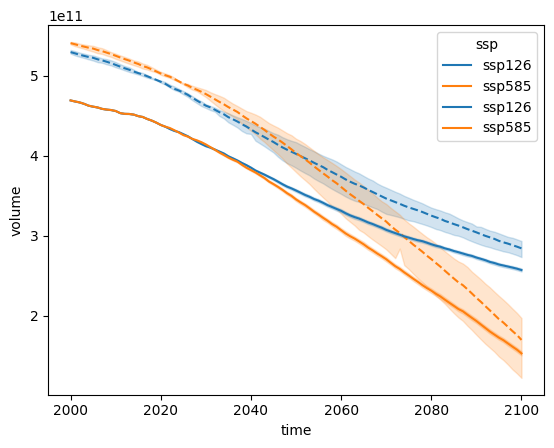

In [133]:
# Summed up glacier volume over all 84 glaciers for Rounce et al. (2023) and for our options
sns.lineplot(x='time', y='volume', hue='ssp',
    data=dt_ssp_all_comm.sum(dim='rgi_id').to_dataframe('volume'), ls = '--')

sns.lineplot(x='time', y='volume', hue='ssp',
    data=dt_oggm_options.sum(dim='rgi_id').to_dataframe('volume'), ls = '-')

- therefore, we just look into volume changes relative to 2020:

In [ ]:
vol_ratio = (dt_ssp_all_comm/dt_ssp_all_comm.sel(time=2020)) / (dt_oggm_options/dt_oggm_options.sel(time=2020))
vol_ratio_sel = vol_ratio.sel(time=2100).sel(ssp = 'ssp126')
vol_ratio_sel = vol_ratio_sel.where(vol_ratio_sel!=np.infty).dropna(dim='rgi_id')
vol_ratio_sel = vol_ratio_sel.where(vol_ratio_sel>0).dropna(dim='rgi_id')
pd_vol_ratio_sel = vol_ratio_sel.to_dataframe(name='vol_ratio').reset_index()

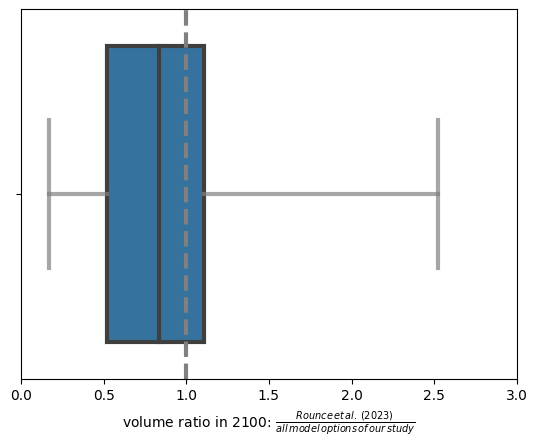

In [125]:
sns.boxplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([0,3])
plt.axvline(1,ls='--', color='grey', lw=3)
plt.xlabel(r'relative volume ratios in 2100: $\frac{Rounce\,et\,al.\,(2023)}{all\,model\,options\,of\,our\,study}$');

for Aletsch glacier: 

In [142]:
pd_vol_ratio_sel.loc[pd_vol_ratio_sel.rgi_id == 'RGI60-11.01450']['vol_ratio'].median()

0.8076480601905036

**Compare different model options and their differences to Rounce et al. (2023):**

/tmp/ipykernel_1994597/3153458287.py:15: UserWarning: Attempting to set identical left == right == 0.3 results in singular transformations; automatically expanding.
  plt.xlim([xlim0,xlim0])
/tmp/ipykernel_1994597/3153458287.py:27: UserWarning: Attempting to set identical left == right == 0.3 results in singular transformations; automatically expanding.
  ax.set_xlim([xlim0,xlim0])


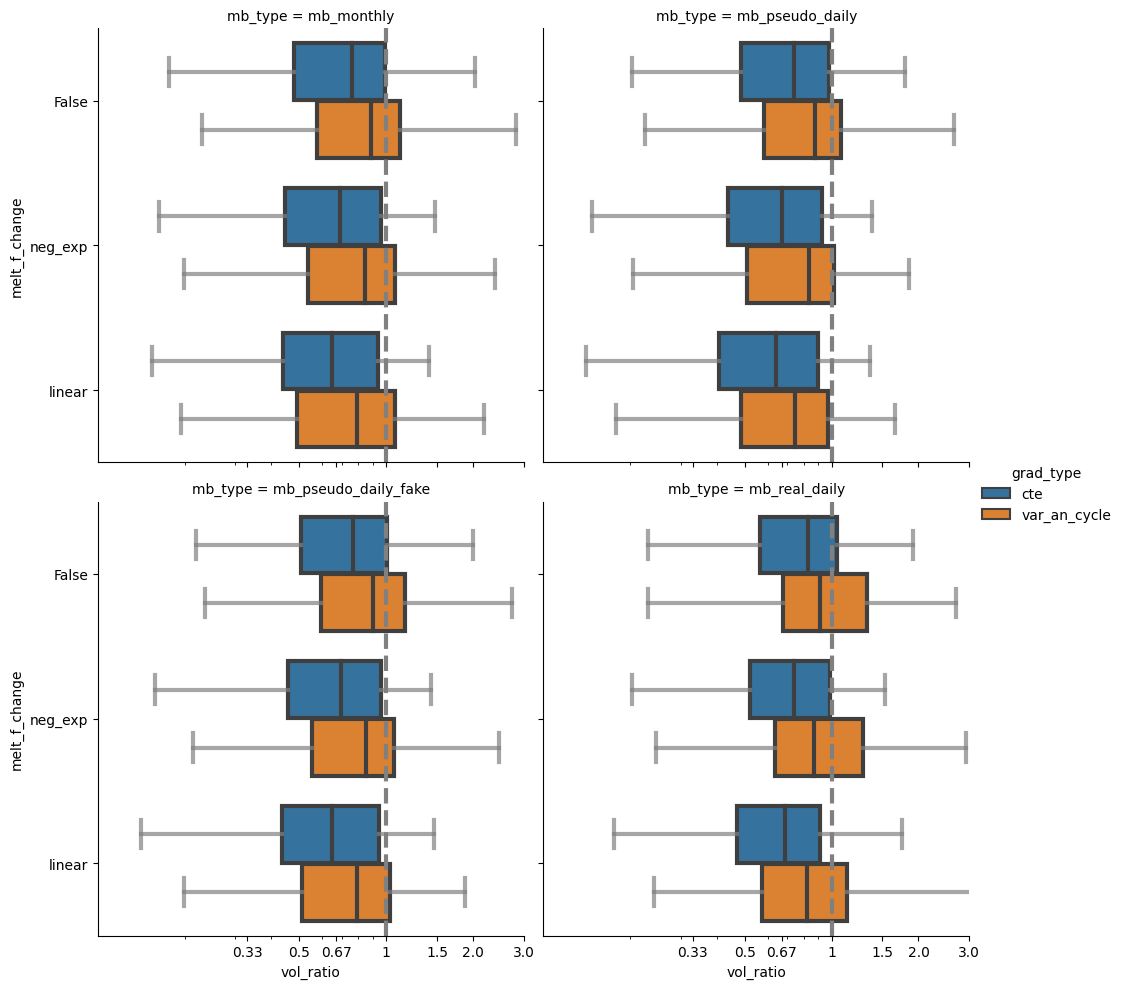

In [140]:

fig = sns.catplot(x= 'vol_ratio',
                  data = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.calib_type=='calib_only_geod_temp_b_0_pf_fit_via_winter_mb'],
            y='melt_f_change', hue='grad_type', col='mb_type',
            kind='box',
                  col_wrap=2,
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
xlim0 = 0.3
xlim1 = 3.3

plt.xlim([xlim0,xlim0])


#plt.axvline(1,ls='--', color='grey', lw=3)
from matplotlib.ticker import ScalarFormatter, NullFormatter

for j in np.arange(0,4,1):
    ax = fig.axes[j]
    ax.axvline(1,ls='--', color='grey', lw=3)
    ax.set_xscale("log")
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_xlim([xlim0,xlim0])
    ax.set_xticklabels([])
    ax.set_xticks([0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0],
                  labels=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0])

**Temperature lapse rate option influences how well our projections coincide with Rounce et al. (2023)** 
- using variable lapse rates (i.e. here `var_an_cycle` results in a relative volume change that is more similar to Rounce et al. (2023)

Text(0.5, 1.0, 'Relative volume projection change differences in 2100 under SSP1-2.6\n for 41 glaciers x 3 GCMs x 45 other model options')

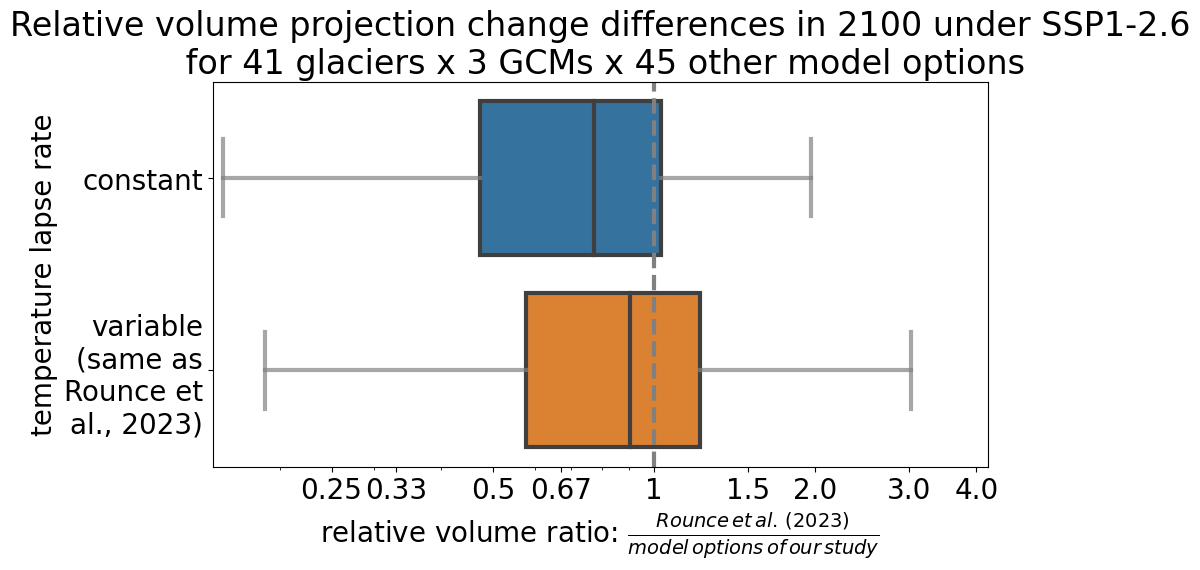

In [255]:
plt.rc('font', size=20)

plt.figure(figsize=(10,5))
sns.boxplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            y='grad_type',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
ax = plt.gca()
ax.axvline(1,ls='--', color='grey', lw=3)

from matplotlib.ticker import ScalarFormatter, NullFormatter

ax.set_xscale("log")
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
#ax.set_xlim([xlim0,xlim0])
ax.set_xlim([0.15,4.2])

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xticks([0.25, 0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0,4.0],
              labels=[0.25, 0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0,4.0])
ax.set_ylabel('temperature lapse rate')
ax.set_yticklabels(['constant', 'variable\n(same as\nRounce et\nal., 2023)'])
ax.set_xlabel(r'relative volume ratio: $\frac{Rounce\,et\,al.\,(2023)}{model\,options\,of\,our\,study}$')
ax.set_title('Relative volume projection change differences in 2100 under SSP1-2.6\n for 41 glaciers x 3 GCMs x 45 other model options')

In [294]:
pd_vol_ratio_sel.dropna().groupby(by='grad_type').median()

lon     lat    time  hydro_month  calendar_month  vol_ratio
grad_type                                                                    
cte           8.01919  58.651  2100.0          1.0             1.0   0.774175
var_an_cycle  8.01919  58.651  2100.0          1.0             1.0   0.903877

In [26]:
pd_ratio_sel = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.grad_type=='var_an_cycle']
pd_ratio_sel.groupby(by='calib_type').median()

lon     lat    time  \
calib_type                                                               
calib_geod_opt_std_temp_b_0                    8.01919  58.651  2100.0   
calib_geod_opt_winter_mb_approx_std            8.01919  58.651  2100.0   
calib_geod_opt_winter_mb_temp_b_0              8.01919  58.651  2100.0   
calib_only_geod_temp_b_0_pf_cte_via_std        8.01919  58.651  2100.0   
calib_only_geod_temp_b_0_pf_fit_via_winter_mb  8.01919  58.651  2100.0   

                                               hydro_month  calendar_month  \
calib_type                                                                   
calib_geod_opt_std_temp_b_0                            1.0             1.0   
calib_geod_opt_winter_mb_approx_std                    1.0             1.0   
calib_geod_opt_winter_mb_temp_b_0                      1.0             1.0   
calib_only_geod_temp_b_0_pf_cte_via_std                1.0             1.0   
calib_only_geod_temp_b_0_pf_fit_via_winter_mb          1.0             1.0   

                                               vol_ratio  
calib_type                                                
calib_geod_opt_std_temp_b_0                     0.959250  
calib_geod_opt_winter_mb_approx_std             0.927881  
calib_geod_opt_winter_mb_temp_b_0               0.884678  
calib_only_geod_temp_b_0_pf_cte_via_std         0.884445  
calib_only_geod_temp_b_0_pf_fit_via_winter_mb   0.848387

**Temperature-index model options most similar to Rounce et al. (2023)**

In [25]:
pd_ratio_sel = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.grad_type=='var_an_cycle']
pd_ratio_sel = pd_ratio_sel.loc[pd_ratio_sel.melt_f_change == 'neg_exp']
pd_ratio_sel = pd_ratio_sel.loc[pd_ratio_sel.mb_type == 'mb_pseudo_daily_fake']
pd_ratio_sel.dropna().groupby(by='calib_type').median()

lon     lat    time  \
calib_type                                                               
calib_geod_opt_std_temp_b_0                    8.01919  58.651  2100.0   
calib_geod_opt_winter_mb_approx_std            8.01919  58.651  2100.0   
calib_geod_opt_winter_mb_temp_b_0              8.01919  58.651  2100.0   
calib_only_geod_temp_b_0_pf_cte_via_std        8.01919  58.651  2100.0   
calib_only_geod_temp_b_0_pf_fit_via_winter_mb  8.01919  58.651  2100.0   

                                               hydro_month  calendar_month  \
calib_type                                                                   
calib_geod_opt_std_temp_b_0                            1.0             1.0   
calib_geod_opt_winter_mb_approx_std                    1.0             1.0   
calib_geod_opt_winter_mb_temp_b_0                      1.0             1.0   
calib_only_geod_temp_b_0_pf_cte_via_std                1.0             1.0   
calib_only_geod_temp_b_0_pf_fit_via_winter_mb          1.0             1.0   

                                               vol_ratio  
calib_type                                                
calib_geod_opt_std_temp_b_0                     0.978786  
calib_geod_opt_winter_mb_approx_std             0.924869  
calib_geod_opt_winter_mb_temp_b_0               0.895021  
calib_only_geod_temp_b_0_pf_cte_via_std         0.911921  
calib_only_geod_temp_b_0_pf_fit_via_winter_mb   0.853683

- for a MB model option that is most similar to Rounce et al., 2023, the projection of Rounce are between 15 and 2 % (depending on chosen calibration option) smaller compared to our projections 
    - Note that `calib_geod_opt_std_temp_b_0` means option $C_3$ and `calib_only_geod_temp_b_0_pf_fit_via_winter_mb` means option $C_5$

**What about option $C_5$?** 
- C5 rather creates a larger volume in 2100 compared to Rounce et al. 2023 (and also a larger runoff for that time period). 

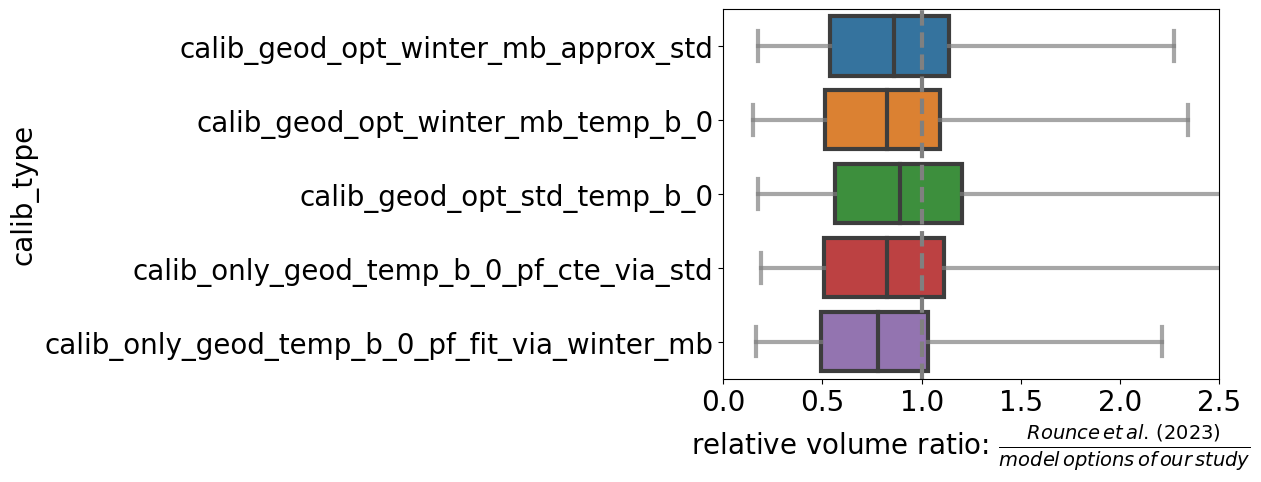

In [146]:
sns.boxplot(x= 'vol_ratio', data = pd_vol_ratio_sel,
            y='calib_type',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([0,2.5])
plt.axvline(1,ls='--', color='grey', lw=3)
plt.xlabel(r'relative volume ratio: $\frac{Rounce\,et\,al.\,(2023)}{model\,options\,of\,our\,study}$');


In [288]:
pd_ratio_c5 = pd_vol_ratio_sel.loc[pd_vol_ratio_sel.calib_type=='calib_only_geod_temp_b_0_pf_fit_via_winter_mb']
pd_ratio_c5.dropna().groupby(by='grad_type').median()

lon     lat    time  hydro_month  calendar_month  vol_ratio
grad_type                                                                    
cte           8.01919  58.651  2100.0          1.0             1.0   0.714932
var_an_cycle  8.01919  58.651  2100.0          1.0             1.0   0.848387

In [289]:
pd_ratio_c5.dropna().groupby(by='melt_f_change').median()

lon     lat    time  hydro_month  calendar_month  vol_ratio
melt_f_change                                                                 
False          8.01919  58.651  2100.0          1.0             1.0   0.844932
linear         8.01919  58.651  2100.0          1.0             1.0   0.732123
neg_exp        8.01919  58.651  2100.0          1.0             1.0   0.775856

In [290]:
pd_ratio_c5.dropna().groupby(by='mb_type').median()

lon     lat    time  hydro_month  calendar_month  \
mb_type                                                                      
mb_monthly            8.01919  58.651  2100.0          1.0             1.0   
mb_pseudo_daily       8.01919  58.651  2100.0          1.0             1.0   
mb_pseudo_daily_fake  8.01919  58.651  2100.0          1.0             1.0   
mb_real_daily         8.01919  58.651  2100.0          1.0             1.0   

                      vol_ratio  
mb_type                          
mb_monthly             0.776782  
mb_pseudo_daily        0.752267  
mb_pseudo_daily_fake   0.777668  
mb_real_daily          0.812167

## Runoff projection comparisons

- in Rounce et al. (2023) runoff is given in `m3` per month
- in our model options it is given in `MT` per year
    - conversion:  m3 a-1 --> 1000 kg a-1 -> Mt a-1 / 1e6 

### Let's start with Aletsch glacier again...

In [215]:
r = '11'
ssp = 'ssp126'
drunoff_l = []
for ssp in ['ssp126', 'ssp585']:
    _drunoff = xr.open_dataset(f'{fpath}/R{r}_glac_runoff_fixed_monthly_1set_2000_2100-{ssp}-Batch-1001-2000.nc')
    _drunoff = _drunoff.groupby('time.year').sum()  # m3 month-1 --> m3 a-1
    _drunoff = _drunoff.rename_dims({'model':'gcm', 'glacier':'rgi_id', 'year':'time'})
    _drunoff = _drunoff.set_index(rgi_id='RGIId')
    _drunoff = _drunoff.set_index(time='year')
    _drunoff = _drunoff.set_index(gcm = 'Climate_Model')
    _drunoff['ssp'] = ssp
    drunoff_l.append(_drunoff)
drunoff = xr.concat(drunoff_l, dim = 'ssp')
    


Runoff relative to 2020:

Text(0.5, 44.7222222222222, 'year')

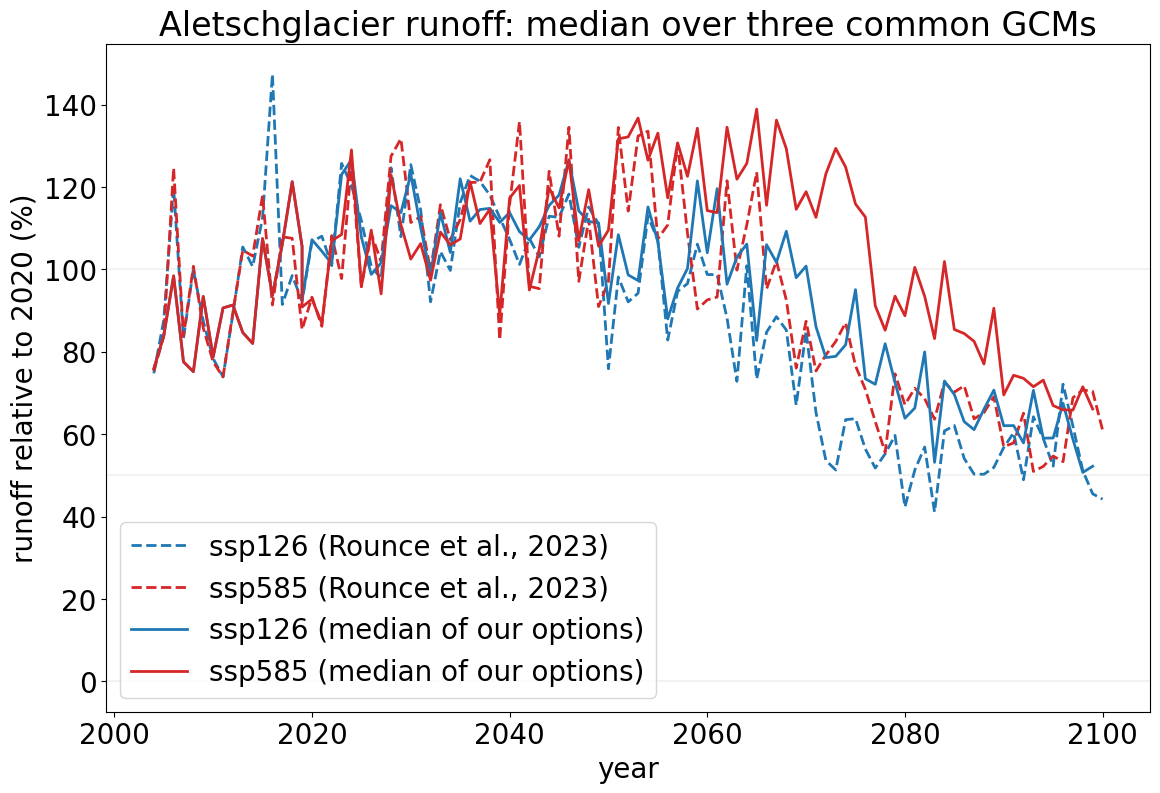

In [251]:
plt.figure(figsize=(12,8))
ax = plt.gca()

rgi_ids = ['RGI60-11.01450']

### Rounce et al. (2023)

_d = drunoff.sel(gcm = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])
_dd = _d.sel(rgi_id = rgi_ids).sum(dim='rgi_id') # kg into V (km3)
_dd = _dd.sel(time=slice(2004,2100))
drunoff_vol = _dd.median(dim='gcm').glac_runoff_fixed_monthly 
drunoff_vol_2020 = drunoff_vol.sel(time=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_runoff_rel_ssp = drunoff_vol.sel(ssp=ssp)*100/drunoff_vol_2020
    ax.plot(dt_runoff_rel_ssp.time, dt_runoff_rel_ssp,
             label=ssp+ ' (Rounce et al., 2023)',
            color = colors_ssp[j], ls = '--', lw=2) #kg/m3


#### our options 
dr_oggm_mbsandbox_options = xr.open_dataset(f'{data_path}/4_runoff_volume_proj_common_running_refs_w5e5_isimip3b.nc')
dr_oggm_mbsandbox_options = dr_oggm_mbsandbox_options.sel(gcm = ['gfdl-esm4_r1i1p1f1', 'mpi-esm1-2-hr_r1i1p1f1',
                                                                 'mri-esm2-0_r1i1p1f1'])
dr_oggm_mbsandbox_options['runoff'] = (dr_oggm_mbsandbox_options['melt_off_glacier'] 
                                       + dr_oggm_mbsandbox_options['melt_on_glacier']
                                        + dr_oggm_mbsandbox_options['liq_prcp_off_glacier'] 
                                       + dr_oggm_mbsandbox_options['liq_prcp_on_glacier'])
drunoff_sel = dr_oggm_mbsandbox_options.sel(rgi_id = rgi_ids).runoff.sum(dim='rgi_id') # kg into V (km3)

drunoff_sel = drunoff_sel.median(dim=['grad_type','mb_type', 'melt_f_change', 'calib_type'])

drunoff_sel = drunoff_sel.sel(time=slice(2004.,2100.))
drunoff_vol = drunoff_sel.median(dim='gcm') 
drunoff_vol_2020 = drunoff_vol.sel(time=2020).sel(ssp=['ssp126', 'ssp585']).mean(dim='ssp')

for j,ssp in enumerate(['ssp126', 'ssp585']):
    dt_vol_rel_ssp = drunoff_vol.sel(ssp=ssp)*100/drunoff_vol_2020
    ax.plot(dt_vol_rel_ssp.time, dt_vol_rel_ssp.values,
             label=ssp+ ' (median of our options)',
            color = colors_ssp[j],lw=2) #kg/m3
    # year where more than 50% of glacier volume is lost relative to 2020
    #yr_50_perc = dt_vol_rel_ssp.where(dt_vol_rel_ssp<=50).dropna(dim='time').isel(time=0).time
    #plt.axvline(yr_50_perc, color = colors_ssp[j], alpha = 0.3)
    #print(dt_vol_rel_ssp.sel(time=2100).values)
    #print(f'our options: yr >50% lost under {ssp}: {yr_50_perc.values}, lost in 2100: {dt_vol_rel_ssp.sel(time=2100).values:.1f}%')


plt.axhline(0, color = 'grey', alpha = 0.1)
plt.axhline(50, color='grey', alpha = 0.1)
plt.axhline(100, color='grey', alpha = 0.1)
plt.ylabel('runoff relative to 2020 (%)')

plt.legend()

# ax2.ylim([-0.01,125])

plt.title(f'Aletschglacier runoff: median over three common GCMs')
plt.tight_layout()
plt.xlabel('year')

Absolute runoff comparisons:

In [252]:
#  # m3 a-1 --> 1000 kg  a-1 -> Mt a-1 / 1e6 
drunoff_aletsch = drunoff.sel(rgi_id = 'RGI60-11.01450').sel(time=slice(2004,2100)).glac_runoff_fixed_monthly/1e6 
drunoff_aletsch_rounce = drunoff_aletsch.sel(gcm = ['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ]).median(dim='gcm')
#pd_runoff_aletsch_rounce = drunoff_aletsch.to_dataframe(name='runoff').reset_index()
#pd_runoff_aletsch['runoff'] = pd_runoff_aletsch.runoff

In [253]:
_d = dr_oggm_mbsandbox_options.sel(rgi_id = 'RGI60-11.01450').runoff.sel(time=slice(2004,2100))
d_runoff_aletsch_oggm_mbsandbox_options_med = _d.median(dim=['grad_type','mb_type',
                                                             'melt_f_change',
                                                             'calib_type']).median(dim='gcm')/1e9
#pd_runoff_aletsch_oggm_mbsandbox_options_med = _d.to_dataframe('runoff').reset_index()

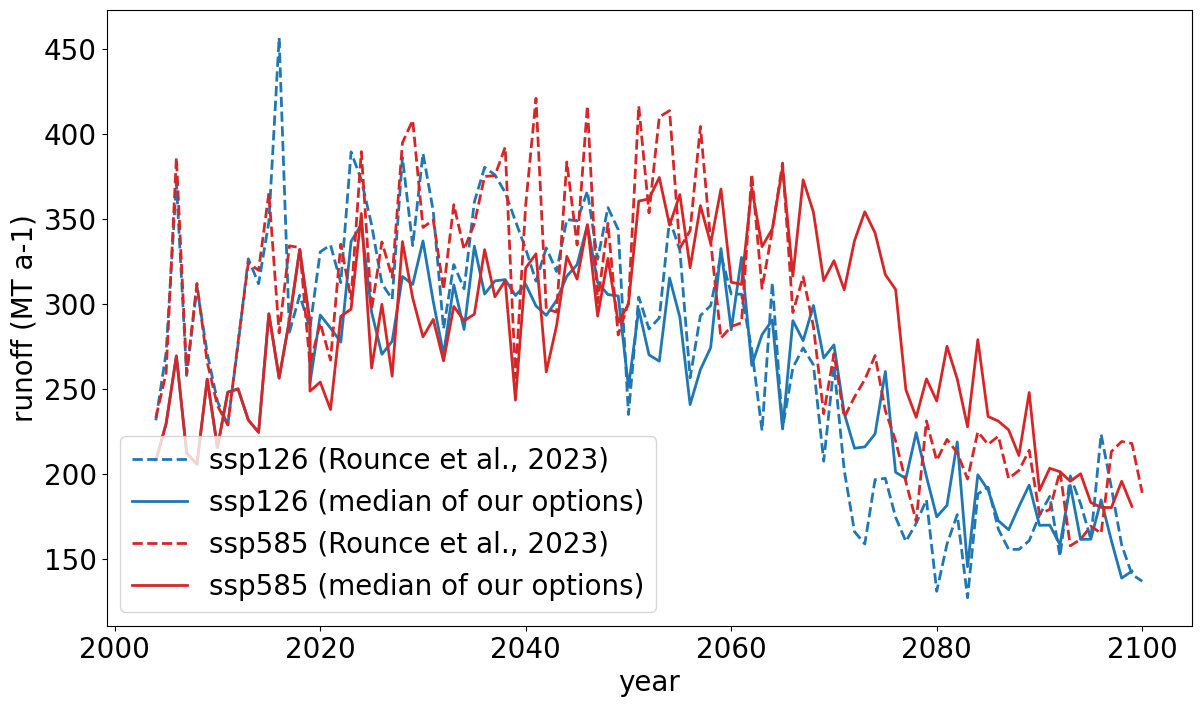

In [254]:
plt.figure(figsize=(14,8))
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(drunoff_aletsch_rounce.time, drunoff_aletsch_rounce.sel(ssp=ssp),
             label=ssp+ ' (Rounce et al., 2023)', ls='--',
            color = colors_ssp[j], lw=2)
    plt.plot(d_runoff_aletsch_oggm_mbsandbox_options_med.time,
             d_runoff_aletsch_oggm_mbsandbox_options_med.sel(ssp=ssp),
             label=ssp+ ' (median of our options)', ls='-',
            color = colors_ssp[j], lw=2)
    
plt.ylabel('runoff (MT a-1)')
plt.xlabel('year')
plt.legend()

- between 100 and 850 MT a-1 from our different massbalance-sandbox options -> strongly depending on applied $p_f$
    - on the median over all our calibration and temperature-index model options, we see similar absolute and relative runoff changes 

### Get the runoff for all glaciers

In [3]:
import os
rounce_files = os.listdir(fpath)
rounce_files_runoff = []
for f in rounce_files:
    if ('runoff' in f) and ('.xml' not in f):
        rounce_files_runoff.append(f)

In [35]:
# for the global comparison, I only look at the sum here ... 
run = False
if run:
    
    drunoff_r_l = []
    for r in np.arange(1,20,1): # 1,20
        try:
            if r<10:
                r = f'0{r}'
            else:
                r = str(r)
            drunoff_l = []    
            for ssp in ['ssp126', 'ssp585']:
                drunoff_b = []
                for f in rounce_files_runoff:
                    if (f'R{r}' in f) and (ssp in f):
                        _drunoff = xr.open_dataset(f'{fpath}/{f}')
                        #_drunoff = xr.open_dataset(f'{fpath}/R{r}_glac_runoff_fixed_monthly_1set_2000_2100-{ssp}-Batch-1001-2000.nc')
                        _drunoff = _drunoff.groupby('time.year').sum()  # m3 month-1 --> m3 a-1
                        _drunoff = _drunoff.rename_dims({'model':'gcm', 'glacier':'rgi_id', 'year':'time'})
                        _drunoff = _drunoff.set_index(rgi_id='RGIId')
                        _drunoff = _drunoff.set_index(time='year')
                        _drunoff = _drunoff.set_index(gcm = 'Climate_Model')
                        drunoff_b.append(_drunoff)
                _drunoff_l = xr.concat(drunoff_b, dim='rgi_id')
                _drunoff_l = _drunoff_l.glac_runoff_fixed_monthly.sum(dim='rgi_id')
                _drunoff_l['ssp'] = ssp

                drunoff_l.append(_drunoff_l)

            drunoff_r = xr.concat(drunoff_l, dim = 'ssp')
            drunoff_r['rgi_region'] = r
            drunoff_r_l.append(drunoff_r)
        except:
            pass
    drunoff = xr.concat(drunoff_r_l, dim = 'rgi_region')
    drunoff.to_netcdf('../trials_or_old_notebooks/runoff_rounce_reg_sum.nc')
else:
    drunoff = xr.open_dataset('../trials_or_old_notebooks/runoff_rounce_reg_sum.nc')


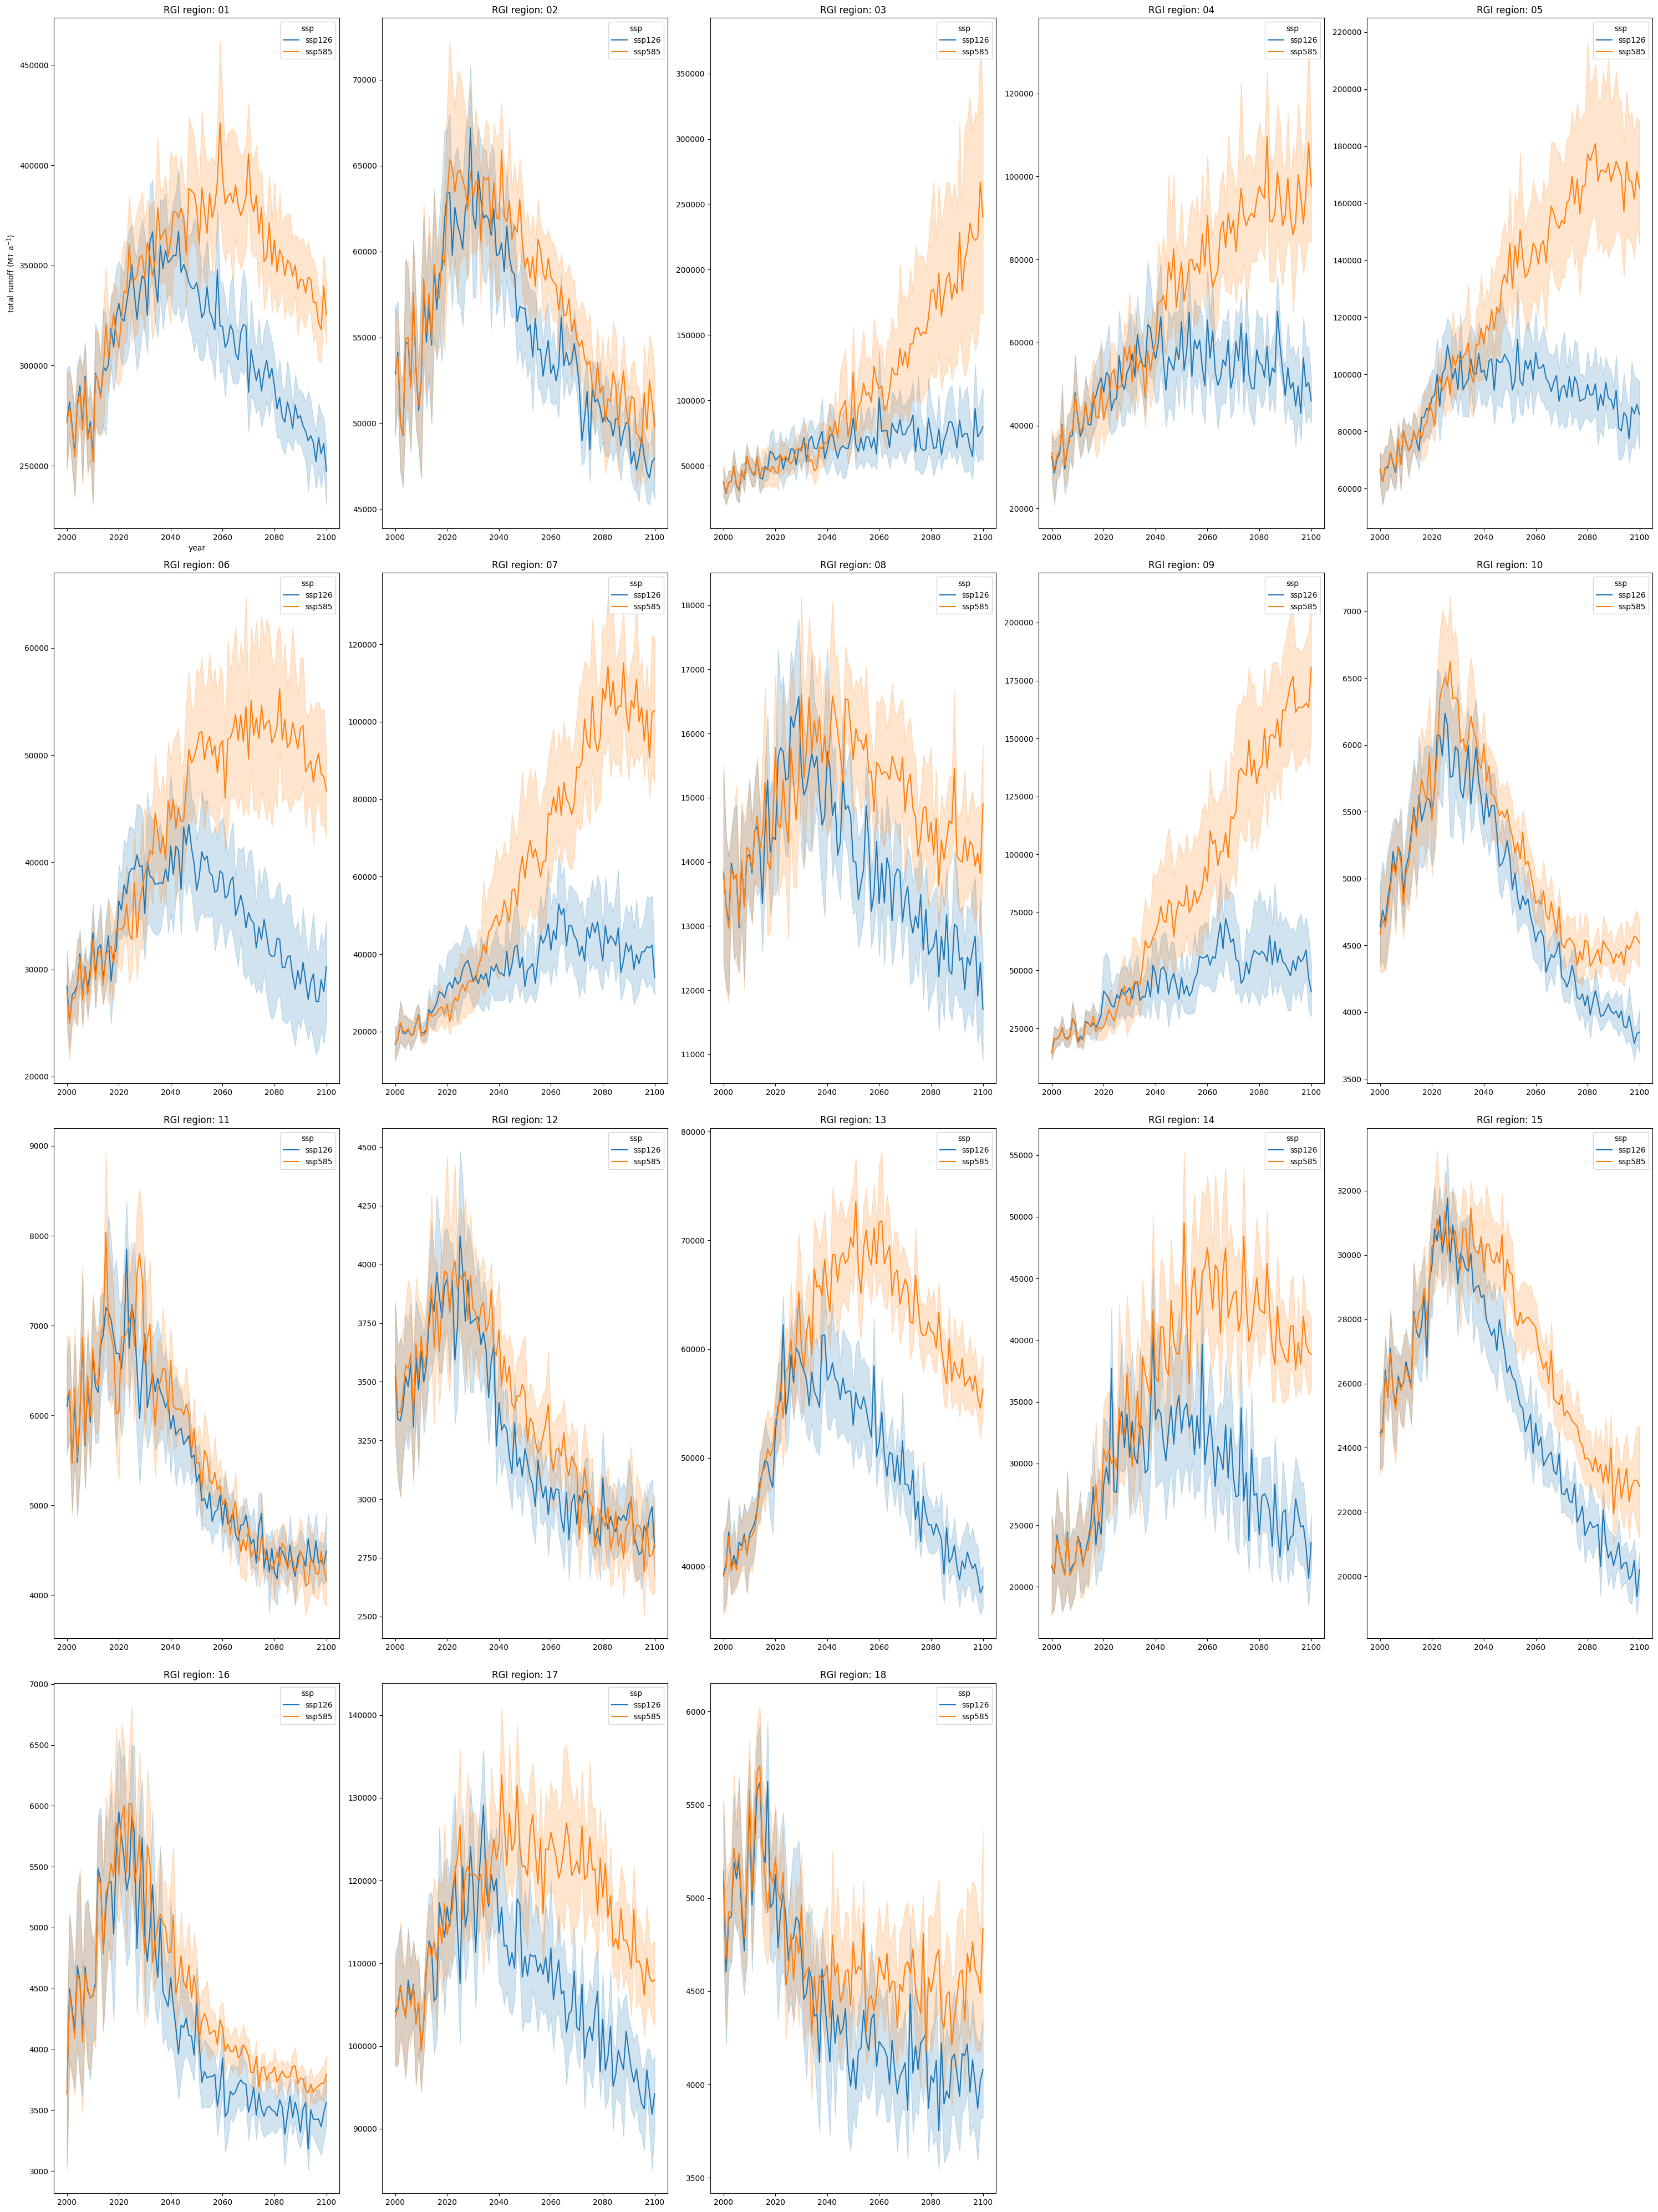

In [21]:
plt.figure(figsize=(30,40))

for j,r in enumerate(np.arange(1,19,1)): #np.arange(1,20,1):
    if r<10:
        r = f'0{r}'
    else:
        r = str(r)
    
    plt.subplot(4,5,j+1)
    pd_runoff_reg_rounce = drunoff.sel(rgi_region=str(r)).to_dataframe()  # .sum(dim='rgi_id')
    pd_runoff_reg_rounce['runoff_MT'] = pd_runoff_reg_rounce['glac_runoff_fixed_monthly']/1e6
    sns.lineplot(x='time', y='runoff_MT', hue='ssp',
                 data= pd_runoff_reg_rounce)
    if j == 0:
        plt.ylabel(r'total runoff (MT a$^{-1}$)') 
        plt.xlabel('year')
    else:
        plt.ylabel('')
        plt.xlabel('')
    plt.title(f'RGI region: {r}')
plt.tight_layout()
plt.savefig('../trials_or_old_notebooks/runoff_rounce_sum.pdf')

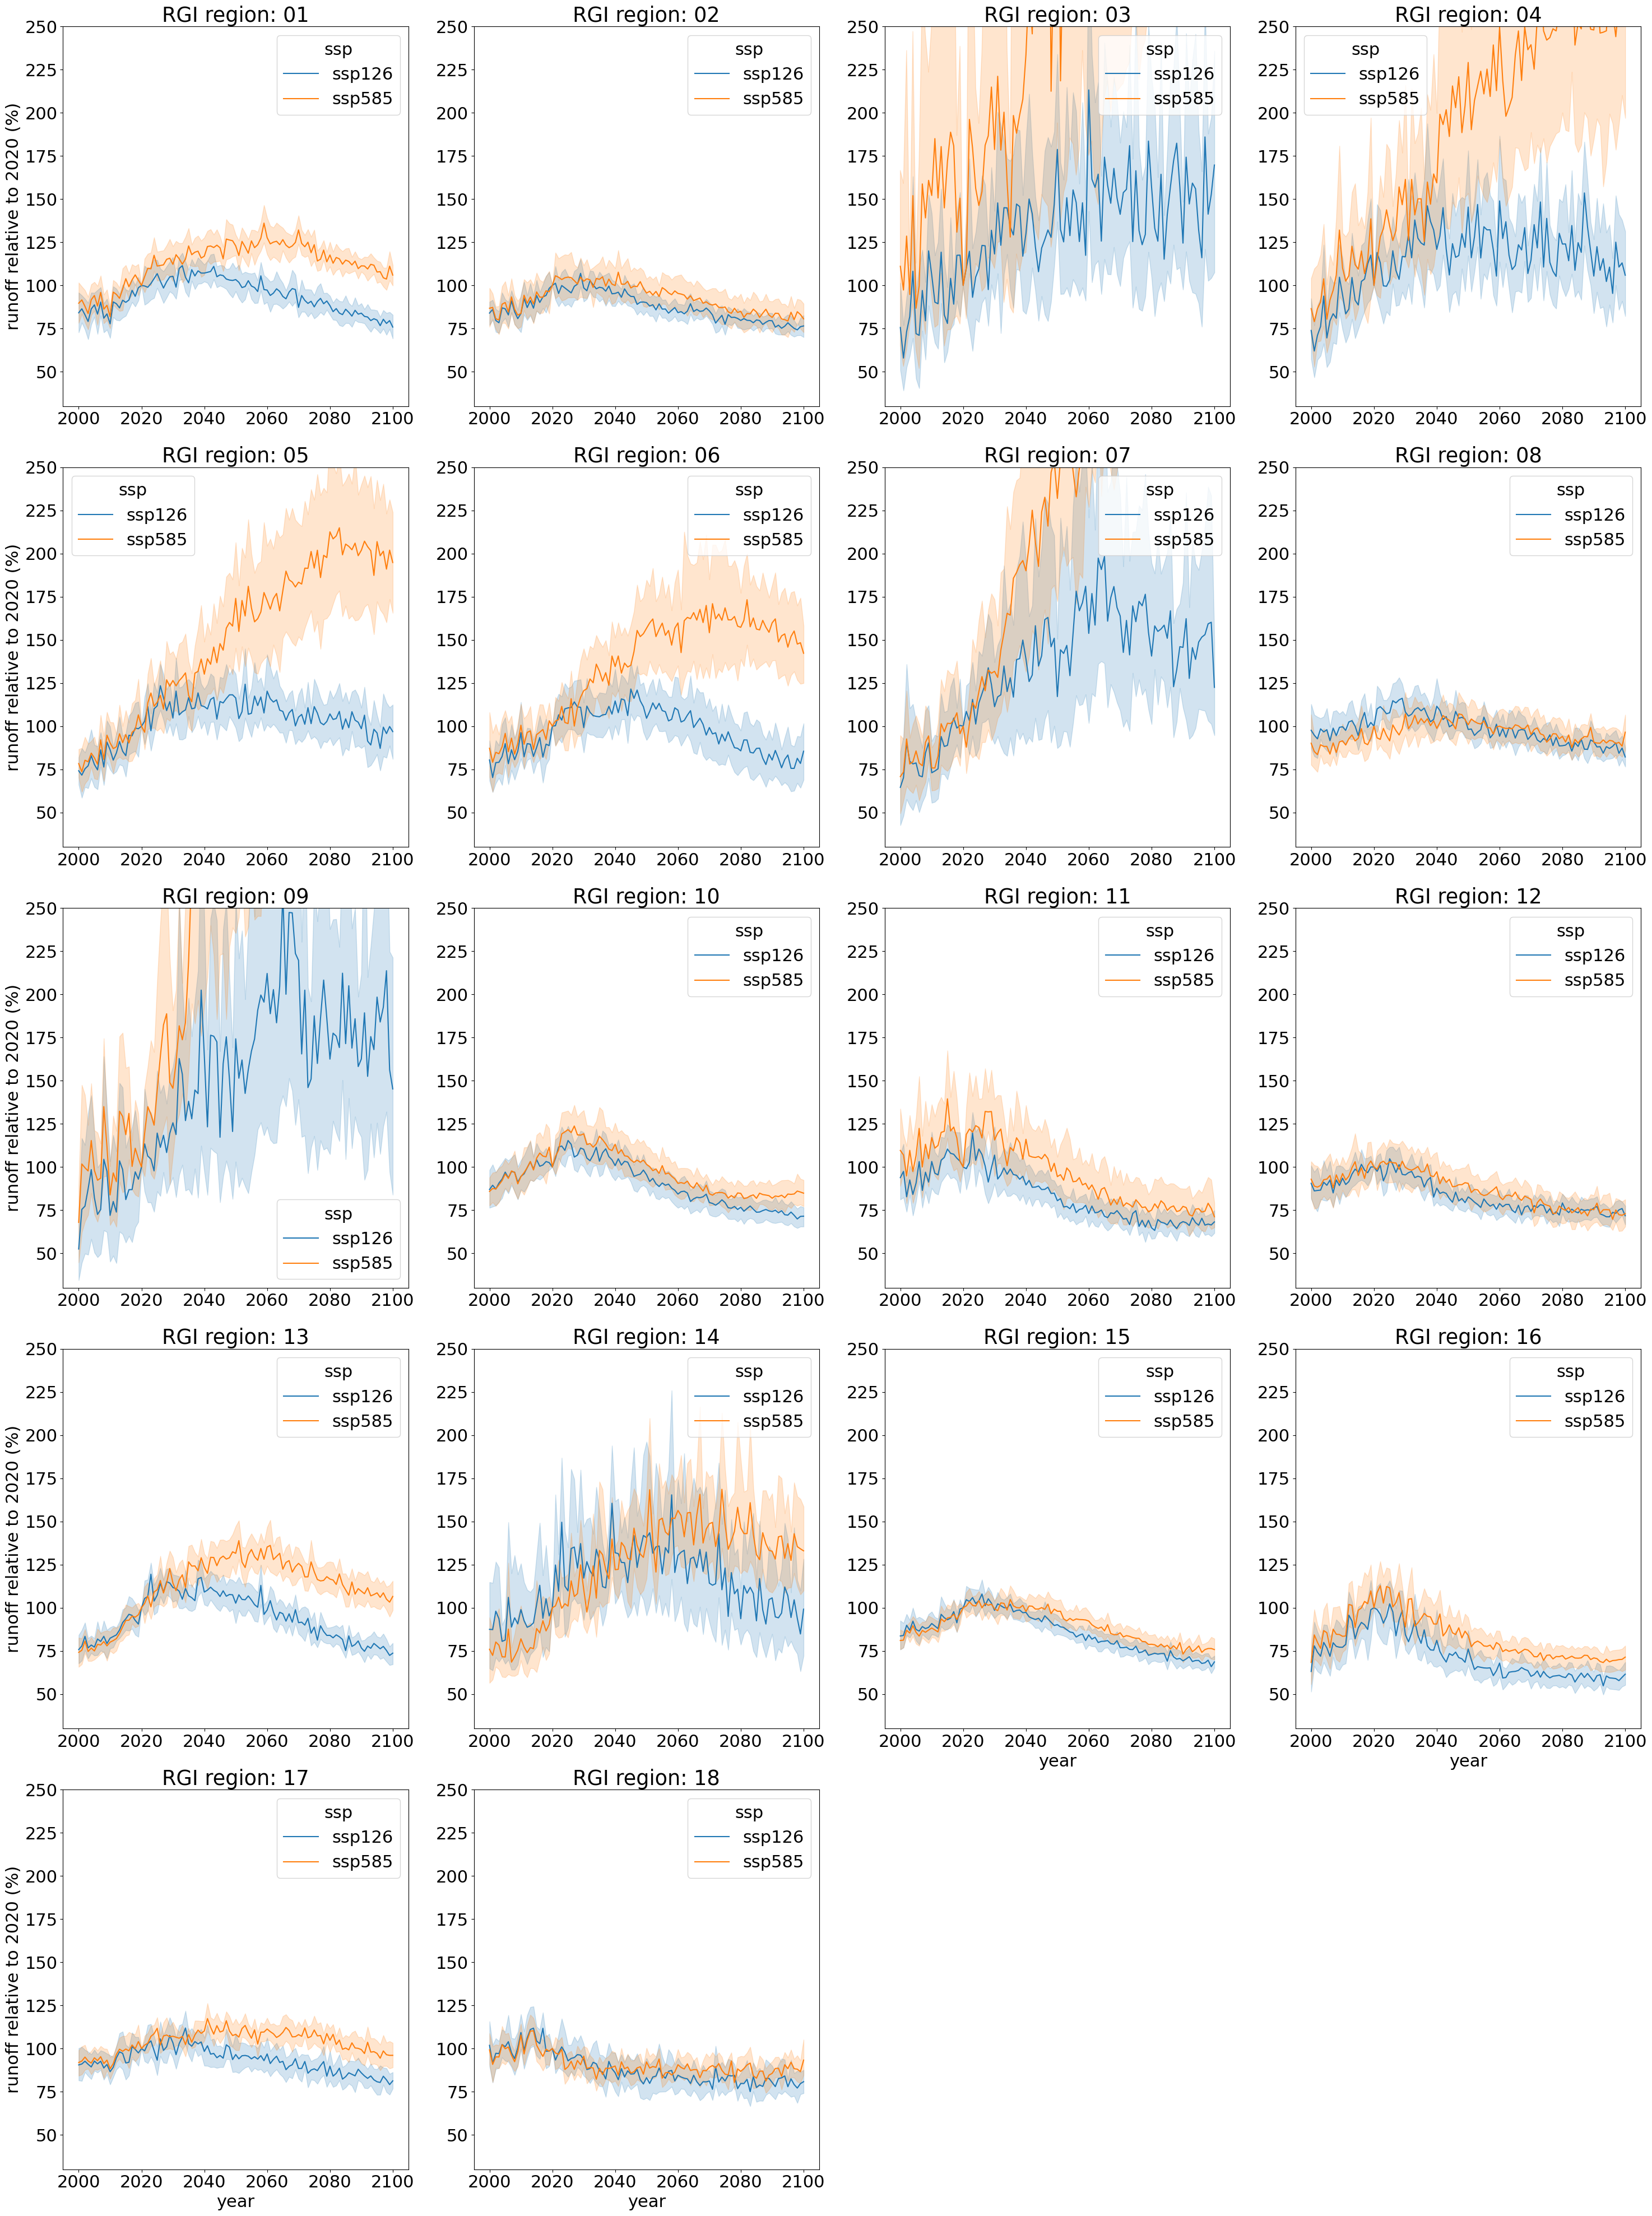

In [119]:
plt.figure(figsize=(30,40))
plt.rc('font', size=22)

for j,r in enumerate(np.arange(1,19,1)): #np.arange(1,20,1):
    if r<10:
        r = f'0{r}'
    else:
        r = str(r)
    
    plt.subplot(5,4,j+1)
    pd_runoff_reg_rounce = (drunoff.sel(rgi_region=str(r))*100/drunoff.sel(rgi_region=str(r)).sel(time=2020)).to_dataframe()  # .sum(dim='rgi_id')
    #pd_runoff_reg_rounce['runoff_MT'] = pd_runoff_reg_rounce['glac_runoff_fixed_monthly'] /1e6
    sns.lineplot(x='time', y='glac_runoff_fixed_monthly', hue='ssp',
        data= pd_runoff_reg_rounce)
    if j in [0,4,8,12,16]:
        plt.ylabel(r'runoff relative to 2020 (%)') 
    else:
        plt.ylabel('')

    if j>=14:
        plt.xlabel('year')
    else:
        plt.xlabel('')
    plt.title(f'RGI region: {r}')
    plt.ylim([30,250])
        
plt.tight_layout()
plt.savefig('../trials_or_old_notebooks/runoff_rounce_sum_relative.pdf')

### then just look at runoff for the common glaciers examined in our study

In [84]:
# data path -> data created from 00_data_creating scripts
data_path = '../01_data'
dt_oggm_options_r = xr.open_dataset(f'{data_path}/4_runoff_volume_proj_common_running_refs_w5e5_isimip3b.nc')
rgi_id_ref_r = list(dt_oggm_options_r.rgi_id.values)
dt_oggm_options_r['time'] = dt_oggm_options_r.time.astype(int)

In [67]:
# this here is too expensive to run, maybe I just look at the common glaciers
# and for the global comparison, I only do the average??? 

drunoff_r_l = []
for r in np.arange(1,19,1): # no RGI region 19 inside 
    if r<10:
        r = f'0{r}'
    else:
        r = str(r)
    drunoff_l = []  
    try:
        for ssp in ['ssp126', 'ssp585']:
            drunoff_b = []
            for f in rounce_files_runoff:
                try:
                    if (f'R{r}' in f) and (ssp in f):
                        _drunoff = xr.open_dataset(f'{fpath}/{f}')
                        #_drunoff = xr.open_dataset(f'{fpath}/R{r}_glac_runoff_fixed_monthly_1set_2000_2100-{ssp}-Batch-1001-2000.nc')
                        _drunoff = _drunoff.rename_dims({'model':'gcm', 'glacier':'rgi_id'})
                        _drunoff = _drunoff.set_index(rgi_id='RGIId')
                        _drunoff = _drunoff.set_index(gcm = 'Climate_Model')

                        _drunoff = _drunoff.sel(gcm=['GFDL-ESM4', 'MPI-ESM1-2-HR', 'MRI-ESM2-0' ])
                        _comm_glac = list(set(rgi_id_ref_r).intersection(_drunoff.rgi_id.values))
                        _drunoff = _drunoff.sel(rgi_id=_comm_glac)
                        _drunoff = _drunoff.groupby('time.year').sum()  # m3 month-1 --> m3 a-1
                        _drunoff = _drunoff.rename_dims({'year':'time'})
                        _drunoff = _drunoff.set_index(time='year')
                        drunoff_b.append(_drunoff)
                except:
                    pass
            _drunoff_l = xr.concat(drunoff_b, dim='rgi_id')
            _drunoff.close()
            _drunoff_l = _drunoff_l.glac_runoff_fixed_monthly #.sum(dim='rgi_id')
            _drunoff_l['ssp'] = ssp

            drunoff_l.append(_drunoff_l)

        drunoff_r = xr.concat(drunoff_l, dim = 'ssp')
        drunoff_r['rgi_region'] = r
        drunoff_r_l.append(drunoff_r)
    except ValueError: #("must supply at least one object to concatenate"):
        pass
drunoff_rounce_comm = xr.concat(drunoff_r_l, dim = 'rgi_id')  # rgi_region
drunoff_rounce_comm['gcm'] = [x.lower() for x in drunoff_rounce_comm.gcm.values]
drunoff_rounce_comm = drunoff_rounce_comm.sel(time=slice(2004,2100,1))

In [85]:
dt_oggm_options_r['runoff_MT'] = (dt_oggm_options_r['melt_off_glacier'] 
                                       + dt_oggm_options_r['melt_on_glacier']
                                        + dt_oggm_options_r['liq_prcp_off_glacier'] 
                                       + dt_oggm_options_r['liq_prcp_on_glacier'])/1e9
dt_oggm_options_r = dt_oggm_options_r.sel(time =slice(2004,2100,1))

In [86]:
# select common glaciers & GCMs  
common_rgis_r = list(set(rgi_id_ref_r).intersection(drunoff_rounce_comm.rgi_id.values))
common_gcms_r = list(set([x[:-len('_r1i1p1f1')] for x in dt_oggm_options_r.gcm.values]).intersection(drunoff_rounce_comm.gcm.values))

dt_oggm_options_r = dt_oggm_options_r.sel(gcm = [x+'_r1i1p1f1' for x in common_gcms_r])
dt_oggm_options_r = dt_oggm_options_r.sel(rgi_id = common_rgis_r).runoff_MT
dt_oggm_options_r.coords['gcm'] = common_gcms_r

# select david rounce volume data ... 
dt_runoff_rounce_ssp_all_comm = drunoff_rounce_comm.sel(rgi_id = common_rgis_r)
dt_runoff_rounce_ssp_all_comm = dt_runoff_rounce_ssp_all_comm.sel(gcm = common_gcms_r)/1e6
dt_runoff_rounce_ssp_all_comm = dt_runoff_rounce_ssp_all_comm.sel(time = dt_oggm_options_r.time)

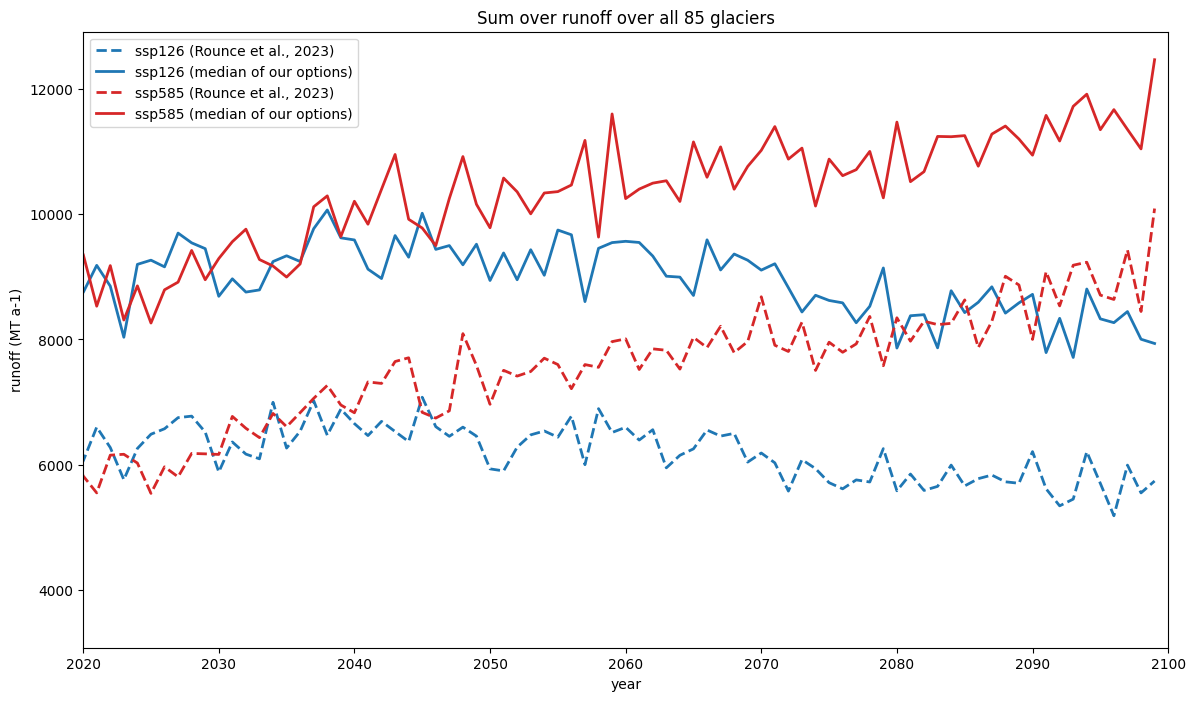

In [104]:
# Summed up glacier runoff over all 85 glaciers for Rounce et al. (2023) and for our options
colors_ssp = ['#1f77b4',  '#d62728']
dt_oggm_options_r_med_sum = dt_oggm_options_r.median(dim=['grad_type', 'mb_type',
                              'melt_f_change', 'calib_type']).median(dim='gcm').sum(dim='rgi_id')
dt_runoff_rounce_ssp_all_comm_med_sum = dt_runoff_rounce_ssp_all_comm.median(dim='gcm').sum(dim='rgi_id')
plt.figure(figsize=(14,8))
for j,ssp in enumerate(['ssp126', 'ssp585']):
    plt.plot(dt_runoff_rounce_ssp_all_comm_med_sum.time, 
             dt_runoff_rounce_ssp_all_comm_med_sum.sel(ssp=ssp),
             label=ssp+ ' (Rounce et al., 2023)', ls='--',
             color = colors_ssp[j], lw=2)
    plt.plot(dt_oggm_options_r_med_sum.time,
             dt_oggm_options_r_med_sum.sel(ssp=ssp),
             label=ssp+ ' (median of our options)', ls='-',
             color = colors_ssp[j], lw=2)
    
plt.ylabel('runoff (MT a-1)')
plt.xlabel('year')
plt.xlim([2020,2100])
plt.title('Sum over runoff over all 85 glaciers')
plt.legend();

### relative runoff ratio for the 85 common running glaciers

In [107]:
runoff_ratio.sel(time=slice(2090,2100)).time

<xarray.DataArray 'time' (time: 10)>
array([2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099])
Coordinates:
  * time     (time) int64 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099

In [109]:
runoff_ratio = (dt_runoff_rounce_ssp_all_comm/dt_runoff_rounce_ssp_all_comm.sel(time=2020)) / (dt_oggm_options_r/dt_oggm_options_r.sel(time=2020))
runoff_ratio_sel = runoff_ratio.sel(time=slice(2090,2100)).mean(dim='time').sel(ssp = 'ssp126')
runoff_ratio_sel = runoff_ratio_sel.where(runoff_ratio_sel!=np.infty).dropna(dim='rgi_id')
runoff_ratio_sel = runoff_ratio_sel.where(runoff_ratio_sel>0).dropna(dim='rgi_id')
pd_runoff_ratio_sel = runoff_ratio_sel.to_dataframe(name='runoff_ratio').reset_index()

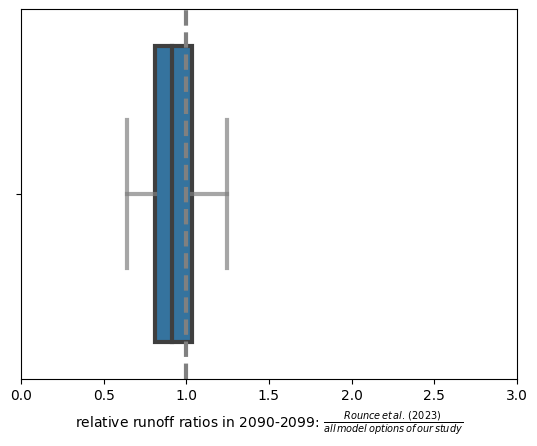

In [111]:
sns.boxplot(x= 'runoff_ratio', data = pd_runoff_ratio_sel,
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([0,3])
plt.axvline(1,ls='--', color='grey', lw=3)
plt.xlabel(r'relative runoff ratios in 2090-2099: $\frac{Rounce\,et\,al.\,(2023)}{all\,model\,options\,of\,our\,study}$');


/tmp/ipykernel_3825507/2543131684.py:15: UserWarning: Attempting to set identical left == right == 0.3 results in singular transformations; automatically expanding.
  plt.xlim([xlim0,xlim0])
/tmp/ipykernel_3825507/2543131684.py:27: UserWarning: Attempting to set identical left == right == 0.3 results in singular transformations; automatically expanding.
  ax.set_xlim([xlim0,xlim0])


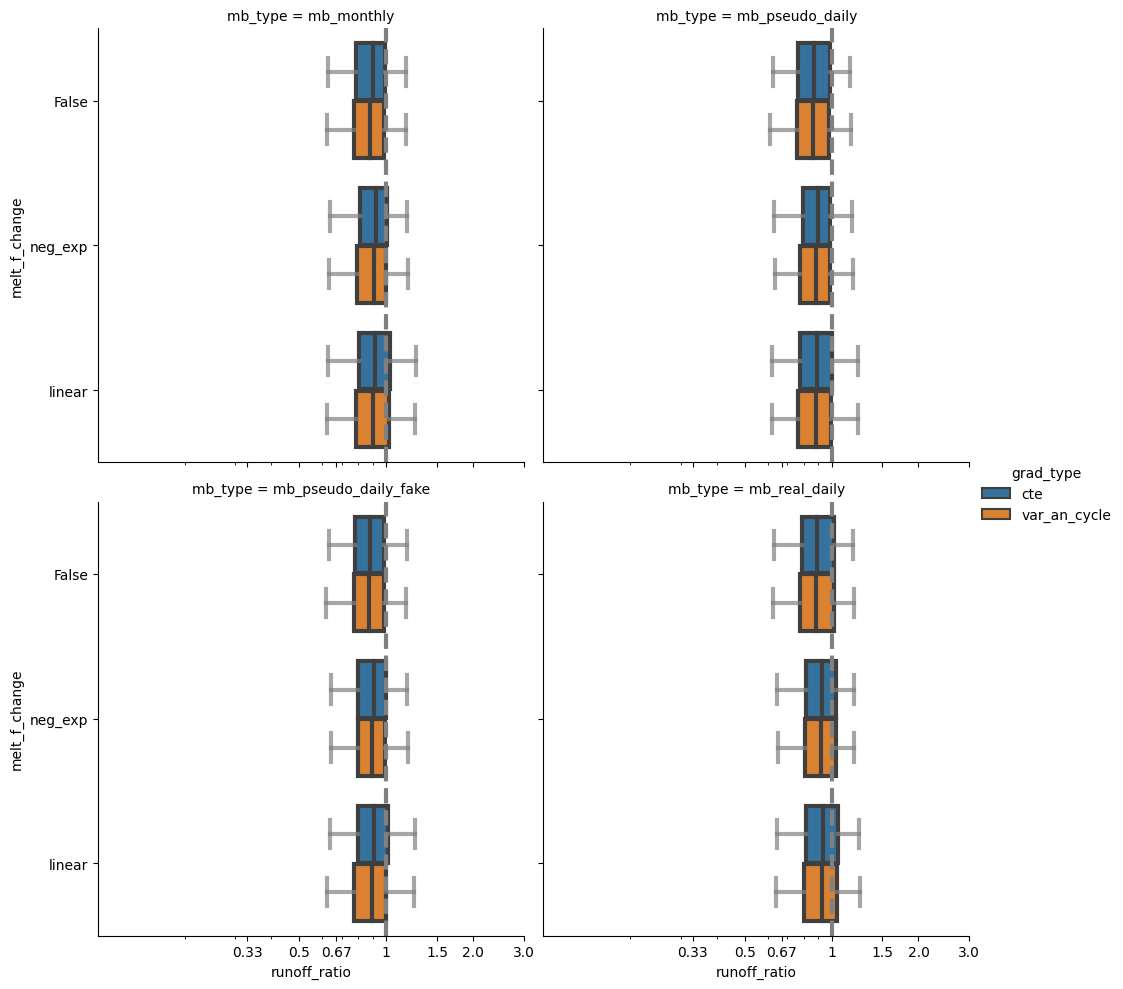

In [112]:

fig = sns.catplot(x= 'runoff_ratio',
                  data = pd_runoff_ratio_sel.loc[pd_runoff_ratio_sel.calib_type=='calib_only_geod_temp_b_0_pf_fit_via_winter_mb'],
            y='melt_f_change', hue='grad_type', col='mb_type',
            kind='box',
                  col_wrap=2,
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
xlim0 = 0.3
xlim1 = 3.3

plt.xlim([xlim0,xlim0])


#plt.axvline(1,ls='--', color='grey', lw=3)
from matplotlib.ticker import ScalarFormatter, NullFormatter

for j in np.arange(0,4,1):
    ax = fig.axes[j]
    ax.axvline(1,ls='--', color='grey', lw=3)
    ax.set_xscale("log")
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_xlim([xlim0,xlim0])
    ax.set_xticklabels([])
    ax.set_xticks([0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0],
                  labels=[0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0])

**Temperature lapse rate option influence on runoff**:

Text(0.5, 1.0, 'Relative runoff projection change differences in 2100 under SSP1-2.6\n for 41 glaciers x 3 GCMs x 45 other model options')

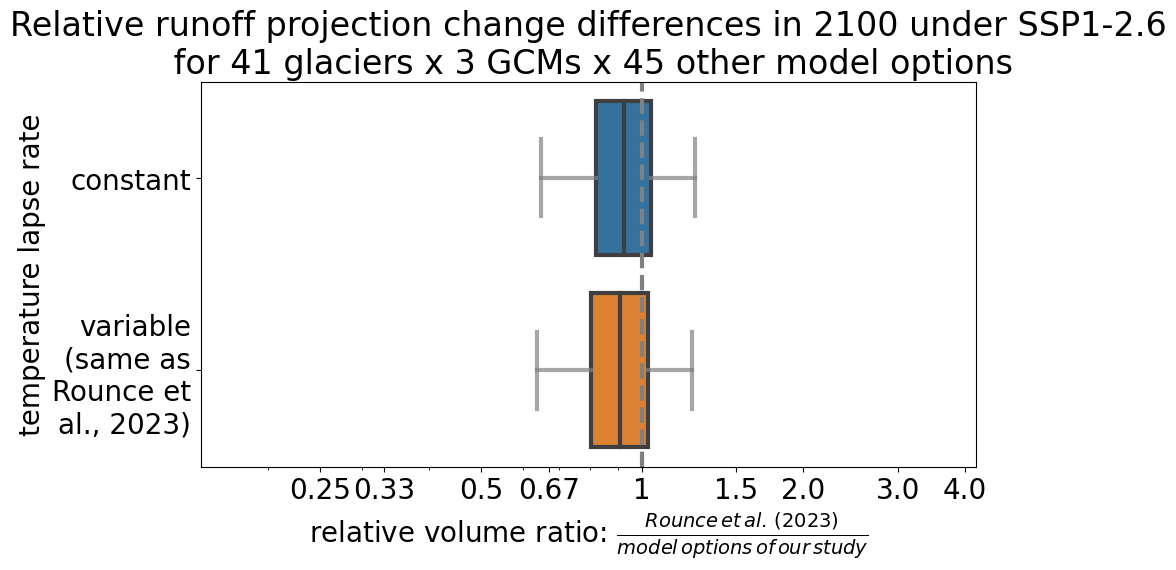

In [113]:
plt.rc('font', size=20)

plt.figure(figsize=(10,5))
sns.boxplot(x= 'runoff_ratio', data = pd_runoff_ratio_sel,
            y='grad_type',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
ax = plt.gca()
ax.axvline(1,ls='--', color='grey', lw=3)

from matplotlib.ticker import ScalarFormatter, NullFormatter

ax.set_xscale("log")
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
#ax.set_xlim([xlim0,xlim0])
ax.set_xlim([0.15,4.2])

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xticks([0.25, 0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0,4.0],
              labels=[0.25, 0.33, 0.5, 0.67, 1,1.5, 2.0, 3.0,4.0])
ax.set_ylabel('temperature lapse rate')
ax.set_yticklabels(['constant', 'variable\n(same as\nRounce et\nal., 2023)'])
ax.set_xlabel(r'relative volume ratio: $\frac{Rounce\,et\,al.\,(2023)}{model\,options\,of\,our\,study}$')
ax.set_title('Relative runoff projection change differences in 2100 under SSP1-2.6\n for 41 glaciers x 3 GCMs x 45 other model options')

**What is about runoff for option C5**

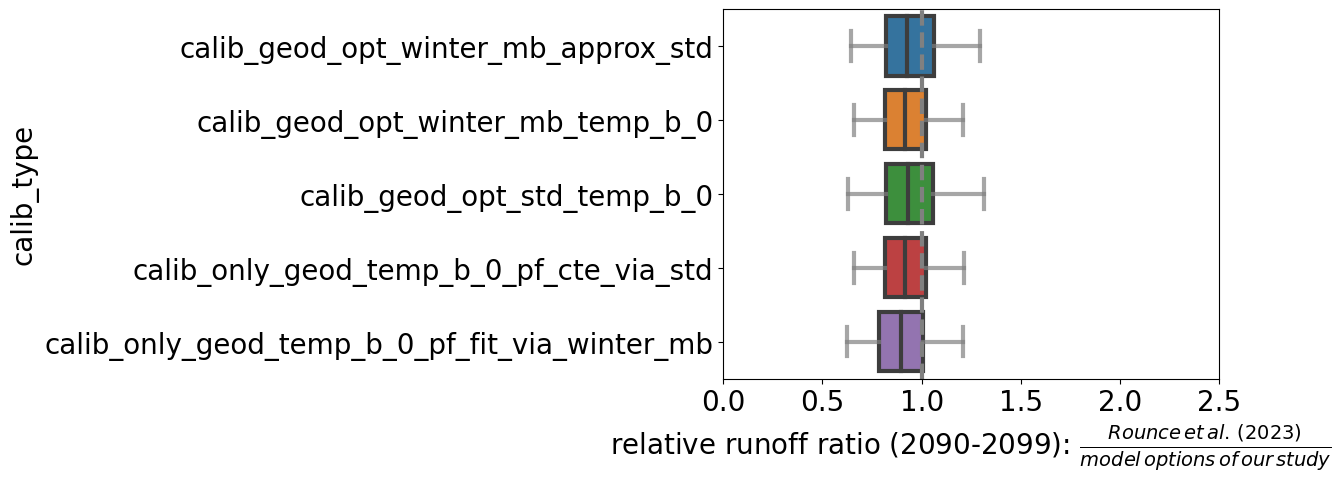

In [114]:
sns.boxplot(x= 'runoff_ratio', data = pd_runoff_ratio_sel,
            y='calib_type',
            fliersize=0, whis=[5,95],
                        #col = 'time',
                        linewidth=3, 
                        saturation=0.7, #ax=ax,
                       capprops={'color':'grey', 'alpha':0.7},
                    whiskerprops={'color':'grey', 'alpha':0.7})
plt.xlim([0,2.5])
plt.axvline(1,ls='--', color='grey', lw=3)
plt.xlabel(r'relative runoff ratio (2090-2099): $\frac{Rounce\,et\,al.\,(2023)}{model\,options\,of\,our\,study}$');
